<a href="https://colab.research.google.com/github/SaraWestWA/DS-Unit-2-Linear-Models/blob/master/module4-model-interpretation/SW_DSTP7_Unit_2_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Description
Personal Loan product is an unsecured loan therefore it is vital to assess the risk of the customers by checking their credit worthiness. This must be done to prevent loan defaults.

The objective is to build a Risk model using the dataset which will assess the risk of a customer defaulting after cross-selling the Personal Loan.

Column Descriptions:

V1: Customer ID\
v2: If a customer has bounced in first EMI (1 : Bounced, 0 : Not bounced)\
V3: Number of times bounced in recent 12 months\
V4: Maximum MOB (Month of business with TVS Credit)\
V5: Number of times bounced while repaying the loan\
V6: EMI {monthly payment}\
V7: Loan Amount\
V8: Tenure {length of loan}\
V9: Dealer codes from where customer has purchased the Two wheeler\
V10: Product code of Two wheeler (MC : Motorcycle , MO : Moped, SC : Scooter)\
V11: No of advance EMI paid\
V12: Rate of interest\
V13: Gender (Male/Female)\
V14: Employment type (HOUSEWIFE : housewife, SELF : Self-employed, SAL : Salaried, PENS : Pensioner, STUDENT : Student)\
V15: Resident type of customer\
V16: Date of birth\
V17: Age at which customer has taken the loan\
V18: Number of loans\
V19: Number of secured loans\
V20: Number of unsecured loans\
V21: Maximum amount sanctioned in the Live loans\
V22: Number of new loans in last 3 months\
V23: Total sanctioned amount in the secured Loans which are Live\
V24: Total sanctioned amount in the unsecured Loans which are Live\
V25: Maximum amount sanctioned for any Two wheeler loan\
V26: Time since last Personal loan taken (in months)\
V27: Time since first consumer durables loan taken (in months)\
V28: Number of times 30 days past due in last 6 months\
V29: Number of times 60 days past due in last 6 months\
V30: Number of times 90 days past due in last 3 months\
V31: Tier ; (Customer's geographical location)\
V32: Target variable ( 1: Defaulters / 0: Non-Defaulters)\

#Initial Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install pandas-profiling==2.7.1
from pandas_profiling import ProfileReport
!pip install category_encoders==2.*
!pip install eli5
# !pip install pdpbox
!pip install shap

#Download data, initial examination of data

In [ ]:
url = 'https://raw.githubusercontent.com/SaraWestWA/DS-Unit-2-Applied-Modeling/master/TVS.csv'

df1 = pd.read_csv(url)
df1.head(2)

Columns (9,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


In [ ]:
# Rename columns

column_names = {'V1': 'ID',
'V2':'miss_1st',
'V3':'annual_bounce',
'V4':'max_MOB',
'V5':'total_bounce',
'V6':'monthly_payment',
'V7':'loan_amount',
'V8': 'installments',
'V9': 'dealer',
'V10': 'product',
'V11': 'advance_payments',
'V12': 'int_rate',
'V13': 'sex',
'V14': 'employment',
'V15': 'residence',
'V16': 'DOB',
'V17': 'age',
'V18': 'num_loans',
'V19': 'num_secured_loans',
'V20': 'num_unsecured_loans',
'V21': 'totaL_credit_max',
'V22': 'new_loans',
'V23': 'secured_max',
'V24': 'unsecured_max',
'V25': 'max_loan',
'V26': 'months_last_loan',
'V27': 'months_first_loan',
'V28': 'late_30_6',
'V29': 'late_60_6',
'V30': 'late_90_3',
'V31': 'location',
'V32': 'defaulter'}

df1.rename(columns = column_names, inplace=True)
list(df1)

['ID',
 'miss_1st',
 'annual_bounce',
 'max_MOB',
 'total_bounce',
 'monthly_payment',
 'loan_amount',
 'installments',
 'dealer',
 'product',
 'advance_payments',
 'int_rate',
 'sex',
 'employment',
 'residence',
 'DOB',
 'age',
 'num_loans',
 'num_secured_loans',
 'num_unsecured_loans',
 'totaL_credit_max',
 'new_loans',
 'secured_max',
 'unsecured_max',
 'max_loan',
 'months_last_loan',
 'months_first_loan',
 'late_30_6',
 'late_60_6',
 'late_90_3',
 'location',
 'defaulter']

##Initial Profile Report

In [ ]:
df1.tail(2)

,ID,miss_1st,annual_bounce,max_MOB,total_bounce,monthly_payment,loan_amount,installments,dealer,product,advance_payments,int_rate,sex,employment,residence,DOB,age,num_loans,num_secured_loans,num_unsecured_loans,totaL_credit_max,new_loans,secured_max,unsecured_max,max_loan,months_last_loan,months_first_loan,late_30_6,late_60_6,late_90_3,location,defaulter
119526,119527,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,2,31990.0,0,NaN,31990.0,43600.0,NaN,13.0,0,0,0,TIER 1,0
119527,119528,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,1,NaN,0,NaN,NaN,49900.0,NaN,30.0,4,3,0,TIER 2,0


In [ ]:
# #Examine the data
# profile = ProfileReport(df1, minimal=True).to_notebook_iframe()

# profile

#Initial Cleaning
Note that 12 of 32 columns are all missing exactly 34,480 values, 28.8% of the data:
 'max_MOB', 
 'total_bounce', 
 'monthly_payment', 
 'loan_amount', 
 'installments', 
 'dealer', 
 'product', 
 'advance_payments', 
 'int_rate', 
 'sex', 
 'employment', 
  'DOB', 
 'age'


 Interestingly 'residence' is missing 35,397 values, 29.6%, due to the location of the column it is likely missing values in the same rows as above.

 To address this these rows will be dropped and a comparison made to the initial ratios for the target (defaulters/nondefaulters). The result is that these rows are permanently dropped.

In [ ]:
# Create a copy of the dataframe, so downloading only has to be preformed once
df2=df1.copy()
df2.shape

(119528, 32)

In [ ]:
# Drop the one instance of the product RETOP
df2 = df2[df2['product'] != 'RETOP']
df2.shape

(119527, 32)

In [ ]:
"""Note that 12 of 32 columns are all missing exactly 34,480 values, 28.8% of the data:
 'max_MOB', 
 'total_bounce', 
 'monthly_payment', 
 'loan_amount', 
 'installments', 
 'dealer', 
 'product', 
 'advance_payments', 
 'int_rate', 
 'sex', 
 'employment', 
  'DOB', 
 'age'
Interestingly 'residence' is missing 35,397 values, 29.6%, due to the location
of the column it is likely missing values in the same rows as above.

To address this these rows will be dropped and a comparison made to the
initial ratios for the target (defaulters/nondefaulters).

"""
df2.dropna(subset=['monthly_payment'], inplace=True)
df2.shape

# The result is that these rows are permanently dropped

(85047, 32)

In [ ]:
"""Compare Maximum 2 Wheekler Loan, 12.6% missing values to
Loan Amount"""
dfx=df2[['max_loan','loan_amount','defaulter']]
dfx['2_percent']=dfx['max_loan']/dfx['loan_amount']
dfx.describe()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,max_loan,loan_amount,defaulter,2_percent
count,74318.000000,85047.000000,85047.00000,74318.000000
mean,41423.286593,39338.050349,0.02180,1.035440
std,12763.380734,11016.680732,0.14603,0.204381
min,10000.000000,10000.000000,0.00000,1.000000
25%,31000.000000,30000.000000,0.00000,1.000000
50%,42297.500000,39700.000000,0.00000,1.000000
75%,49300.000000,48000.000000,0.00000,1.000000
max,540000.000000,96000.000000,1.00000,12.634636


In [ ]:
# Fill missing max_loan values with loan_amount, ratio is mostly 1
df2['max_loan'].fillna(df2['loan_amount'], inplace=True)
print(df2['max_loan'].mean())

40382.99938857338


In [ ]:
# Compare data to verifty ratios are similar
print(df1['defaulter'].value_counts(normalize=True)) #original 
print(df2['defaulter'].value_counts(normalize=True))

0    0.978131
1    0.021869
Name: defaulter, dtype: float64
0    0.9782
1    0.0218
Name: defaulter, dtype: float64


In [ ]:
#Examine the data again
# profile = ProfileReport(df2, minimal=True).to_notebook_iframe()

# profile

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85047 entries, 0 to 85047
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   85047 non-null  int64  
 1   miss_1st             85047 non-null  int64  
 2   annual_bounce        85047 non-null  int64  
 3   max_MOB              85047 non-null  float64
 4   total_bounce         85047 non-null  float64
 5   monthly_payment      85047 non-null  float64
 6   loan_amount          85047 non-null  float64
 7   installments         85047 non-null  float64
 8   dealer               85047 non-null  float64
 9   product              85047 non-null  object 
 10  advance_payments     85047 non-null  float64
 11  int_rate             85047 non-null  float64
 12  sex                  85047 non-null  object 
 13  employment           85047 non-null  object 
 14  residence            84130 non-null  object 
 15  DOB                  85047 non-null 

In [ ]:
# Wrangle residence column, so as not to unneccisarily lose good data when
# dropping rows to achieve balance, 917 missing, 1.1%
df2['residence'] = df2['residence'].replace({np.nan:'UNKNOWN'})

df2['residence'].value_counts()

OWNED               73012
RENT                11001
UNKNOWN               917
OWENED BY OFFICE      117
Name: residence, dtype: int64

In [ ]:
df = df2.copy() #copy dataframe, a good place to "run after"

#Train, Validate, Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Train / Test Split, stratified, highly imbalanced data

# split off test set
train1, test1 = train_test_split(df, test_size=0.2, stratify=df['defaulter'], random_state=42)

#split validation set out of the training data
train2, val2 = train_test_split(train1, test_size=0.2, stratify=train1['defaulter'], random_state=42)

train1.shape, test1.shape, train2.shape, val2.shape

((68037, 32), (17010, 32), (54429, 32), (13608, 32))

In [ ]:
train2.info() # note that 5 columns contain null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54429 entries, 84384 to 7858
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   54429 non-null  int64  
 1   miss_1st             54429 non-null  int64  
 2   annual_bounce        54429 non-null  int64  
 3   max_MOB              54429 non-null  float64
 4   total_bounce         54429 non-null  float64
 5   monthly_payment      54429 non-null  float64
 6   loan_amount          54429 non-null  float64
 7   installments         54429 non-null  float64
 8   dealer               54429 non-null  float64
 9   product              54429 non-null  object 
 10  advance_payments     54429 non-null  float64
 11  int_rate             54429 non-null  float64
 12  sex                  54429 non-null  object 
 13  employment           54429 non-null  object 
 14  residence            54429 non-null  object 
 15  DOB                  54429 non-nu

In [ ]:
# profile = ProfileReport(train2, minimal=True).to_notebook_iframe()

# profile

In [ ]:
# Get ratio of defaulters for train, it matches full data set
train2['defaulter'].value_counts(normalize=True)

0    0.97821
1    0.02179
Name: defaulter, dtype: float64

#Imports for Modeling

In [ ]:
# Imports for pipelines
import shap
from shap import TreeExplainer
import category_encoders as ce
import eli5
from eli5.sklearn import PermutationImportance
from numpy import sqrt
from numpy import argmax
from sklearn.impute import SimpleImputer
# from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection  import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  f1_score, roc_auc_score, roc_curve, precision_score, recall_score, accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
%matplotlib inline

#Run After

In [ ]:
#Create fresh copies of all of the data
test = test1.copy()
train = train2.copy()
val = val2.copy()
train_down = train2.copy() #this will be a downsampled version of train

train_big = train1.copy() #to be used with cross validation
worker = train.copy() #dataframe to test wrangle on individual features

#Pre-Downsampling

This data is very imbalanced. One way to achieve balance while keeping the best data is to drop incomplete rows. However, many of the columns with incomplete data may be dropped in data wrangling. This provides the most complete data for the model.

A second copy of the train data will be made, so that testing can be done on both.

## There are five numerical columns with an high percentage of missing values
  #####  total_credit_max, 64.7%
  ##### secured_max, 81.5%
  ##### unsecured_max, 81.6%
  #####  months_last_loan, 87.0%
  ##### months_first_loan, 80.3%

In [ ]:
"""Drop rows with missing data from the majority class to downsample
# does not work well to wrangle with columns at the same time"""

  # Print out shape info before wrangling
print('Before Wrangling:')
print('Train:', train.shape)
print('Train Downsampled:', train_down.shape)
print(train_down['defaulter'].value_counts())
print('---'*20)

def wrangle_rows(X):
    # copy to avoid errors
    X=X.copy()

    not_default = X[X['defaulter']==0]
    default = X[X['defaulter']==1]

    """data is still too imbalanced, drop additional columns based on missing 
    data, dropping all columns wth missing data makes a nearly perfect balance"""
    not_default = not_default.dropna(thresh = (32))
    X = pd.concat([not_default,default])

    return X

train_down = wrangle_rows(train_down)
# train_big = wrangle_rows(train_big)

print('After Wrangling')
print('Train Downsampled:', train_down.shape)
print('Downsampled Defaulters:')
train_down['defaulter'].value_counts()


Before Wrangling:
Train: (54429, 32)
Train Downsampled: (2266, 32)
1    1186
0    1080
Name: defaulter, dtype: int64
------------------------------------------------------------
After Wrangling
Train Downsampled: (2266, 32)
Downsampled Defaulters:


1    1186
0    1080
Name: defaulter, dtype: int64

In [ ]:
# Dowsampled baselines
train_down['defaulter'].value_counts(normalize=True)

1    0.523389
0    0.476611
Name: defaulter, dtype: float64

#Wrangle Data

In [ ]:
# Columns to drop - 3
goodbye = [
           'ID', #all unique
           'new_loans', #all zero
           'num_loans',  #sum of loans, will magnify outliers from num secured loans
          ]

# Data about the loan - 6 
personal_loan = [
          'loan_amount',
          'monthly_payment',
          'installments',
          'advance_payments',
          'int_rate',
          'miss_1st' # this loan was already pre-sold, presume it's been at least one month
]

# Future data - 6
future=[
        'max_MOB',
        'annual_bounce',
        'total_bounce',
        'late_30_6',
        'late_60_6',
        'late_90_3'
]

# Data on current 2 wheeler loan - 3
loan_info = [
          'dealer',
          'product',
          'max_loan'
]

# Columns about the borrower - 7
person_col = [
          'sex',
          'employment',
          'residence'
          'age',
          'num_unsecured_loans',
          'num_secured_loans', #skewed
          'location',

          ]

# Date to modify - 1
to_date =['DOB']

# Columns with missing data - 5
missing_to_drop =[
          'totaL_credit_max', #includes loan amount
          'secured_max',
          'months_last_loan',
          'unsecured_max',
          'months_first_loan'
          ]

In [ ]:
# Create function to wrangle data sets

def wrangle(X):
    # copy to avoid errors
    X=X.copy()

    # Change DOB column to year only
    for col in to_date:
      X[col] = pd.to_datetime(X[col],infer_datetime_format=True)
      X['YOB'] =X[col].dt.year
    
    X = X.drop(columns = to_date) #replaced by YOB
    # X = X.drop(columns = ['age']) #replaced by YOB

    # Drop extraneous columns & suspected future columns
    X = X.drop(columns = goodbye)
    X = X.drop(columns = future)
    # X = X.drop(columns = personal_loan)


    # Drop columns with high % missing
    X = X.drop(columns = missing_to_drop)
    
    # Return wrangled dataframe
    return X
    
train = wrangle(train)
train_down = wrangle(train_down)
val = wrangle(val)
test = wrangle(test)
train_big = wrangle(train_big)

print('After Wrangling')
print('Train:', train.shape)
print('Validation:',val.shape)
print('Test:', test.shape)
print('Train & Val:', train_big.shape)
print('Train Downsampled:', train_down.shape)

After Wrangling
Train: (54429, 18)
Validation: (13608, 18)
Test: (17010, 18)
Train & Val: (68037, 18)
Train Downsampled: (2266, 18)


In [ ]:
# # Inspect new columns
# profile = ProfileReport(train, minimal=True).to_notebook_iframe()

# profile

#Run After 2

#Target Vector / Features Matrix Split

In [ ]:
# Target, is the client a defaulter
target = 'defaulter'

# Features
features = list(train.drop(columns = [target]))
features

['miss_1st',
 'monthly_payment',
 'loan_amount',
 'installments',
 'dealer',
 'product',
 'advance_payments',
 'int_rate',
 'sex',
 'employment',
 'residence',
 'age',
 'num_secured_loans',
 'num_unsecured_loans',
 'max_loan',
 'location',
 'YOB']

In [ ]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]
X_train_big = train_big[features]
y_train_big = train_big[target]

X_down = train_down[features]
y_down = train_down[target]

In [ ]:
# Print ratios for ease of reference
y_train.value_counts(normalize=True)

0    0.97821
1    0.02179
Name: defaulter, dtype: float64

#Transformations

In [ ]:
# Encode catagorical features on X_train
encoder = ce.OrdinalEncoder()
X_train_e = encoder.fit_transform(X_train)
X_down_e = encoder.transform(X_down)
X_val_e = encoder.transform(X_val)
X_test_e = encoder.transform(X_test)

In [ ]:
# scale data - logistic regression
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_e)
X_down_s = encoder.transform(X_down_e)
X_val_s = scaler.transform(X_val_e)
X_test_s = scaler.transform(X_test_e)

#SMOTE

In [ ]:
# Balance data using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_smote, y_smote = smote.fit_sample(X_train_s, y_train)
X_smote.shape

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


(106486, 17)

#Tracking Dataframe

In [ ]:
# Create dataframe to track outcomes
columns= ['Model','Paid', 'True -', 'False +', 'False -','True +','Default']
tracker= pd.DataFrame(columns=columns)
tracker

,Model,Paid,True -,False +,False -,True +,Default


In [ ]:
# Function to add rows to tracking dataframe
# m_name = Model Name

def row_maker(m_name, y, pred):
  tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
  recall = round((tp/(tp+fn)),2)
  n_recall = round((tn/(tn+fp)),2)
  new_row = {'Model':m_name,'True -':tn, 'False +':fp, 'False -':fn,'True +':tp ,'Paid':n_recall,'Default':recall }
  return new_row

#XGBoost

## XG Boost Simple Model

In [ ]:
# First XGBoost Model

from xgboost import XGBClassifier
booster= XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit on train, score on val
booster.fit(X_train_e, y_train)

y_pred_v = booster.predict(X_val_e)

print('Classification Report:\n\n', classification_report(y_val, y_pred_v))

Classification Report:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     13311
           1       0.00      0.00      0.00       297

    accuracy                           0.98     13608
   macro avg       0.49      0.50      0.49     13608
weighted avg       0.96      0.98      0.97     13608



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
# Complete tracking dataframe

m_name = 'XG Boost'
y = y_val
pred = y_pred_v

new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.0,13311,0,297,0,0.0


### XG Boost Simple Model with PRC Curve
#### Not Useful

invalid value encountered in true_divide


Best Threshold =  0.038879205
F-Score = 0.07807807807807808


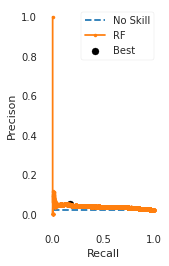

In [ ]:
# Create Precision Recall Curve to find best threshold
# for smiple model
y_hat_v = booster.predict_proba(X_val_e)

# Keep only positive outcome probabilies (defaulters)
y_hat_v=y_hat_v[:,1]

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_val,y_hat_v)

# Calculate f score
fscore = (2*precision*recall)/(precision + recall)
fscore=np.nan_to_num(fscore) #remove Nan(divide by 0)

# index of larges f score (best result)
ix = argmax(fscore)

best=thresholds[ix]

print('Best Threshold = ',best)
print('F-Score =', fscore[ix])

# Plot precision recall curve
plt.figure(figsize=(2,4))
no_skill = len(y_val[y_val==1])/len(y_val)

# plot no skill line
plt.plot([0,1], [no_skill, no_skill], linestyle ='--', label="No Skill")

# plot PRC
plt.plot(recall, precision, marker='.', label='RF')

# plot best threshold point
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# label axes
plt.xlabel('Recall')
plt.ylabel('Precison')
plt.legend();


In [ ]:
# creat prediction with new threshold
y_pred_v_new = (booster.predict_proba(X_val_e)[:,1]>=best).astype(int)

print('XG Boost Downsampled with PRC')
print('---'*20)
# print classification report
print('Classification Report:\n\n', classification_report(y_val, y_pred_v_new))


XG Boost Downsampled with PRC
------------------------------------------------------------
Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.93      0.95     13311
           1       0.05      0.18      0.08       297

    accuracy                           0.91     13608
   macro avg       0.52      0.55      0.52     13608
weighted avg       0.96      0.91      0.93     13608



## XG Boost Downsampled Data

In [ ]:
# XGBoost Model with downsampled data
# (does not work with smote)
m_name = 'XG Boost Down'
from xgboost import XGBClassifier
xgb= XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit on train, score on val
xgb.fit(X_down_e, y_down)

y_pred_v = xgb.predict(X_val_e)

print('Classification Report:\n\n', classification_report(y_val, y_pred_v))


Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.11      0.20     13311
           1       0.02      0.89      0.04       297

    accuracy                           0.13     13608
   macro avg       0.50      0.50      0.12     13608
weighted avg       0.96      0.13      0.19     13608



In [ ]:
# Complete tracking dataframe

m_name = m_name = 'XG Boost Down'
y = y_val
pred = y_pred_v

new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89


##XG Boost SMOTE
####DOES NOT WORK

In [ ]:
# # XGBoost Model with SMOTE
# # Does not work without much data modification
# m_name = 'XG Boost SMOTE'
# from xgboost import XGBClassifier
# xgb= XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# # Fit on train, score on val
# xgb.fit(X_smote, y_smote)

# predictions = xgb.predict(test_data_process.values)  

# y_pred_v = xgb.predict(X_val_e)


# print('Classification Report:\n\n', classification_report(y_val, y_pred_v))

# Logistic Regression

In [ ]:
# Logistic Regression
# define basic model
logreg = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42)

##Simple Logistic Regression

In [ ]:
# Fit simple model on train
lr_simple= logreg.fit(X_train_s, y_train)

# Predict
y_pred_v = lr_simple.predict(X_val_s)
y_pred_test = lr_simple.predict(X_test_s)

m_name = 'Simple Logistic Regression'
y = y_val
pred = y_pred_v

print('Classification Report:\n\n', classification_report(y, pred))

# Complete tracking dataframe
new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

Classification Report:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     13311
           1       0.00      0.00      0.00       297

    accuracy                           0.98     13608
   macro avg       0.49      0.50      0.49     13608
weighted avg       0.96      0.98      0.97     13608



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00


### Simple Logistic Regression Precision Recall Curve

In [ ]:
m_name= 'Simple Logistic Regression PRC'
model = lr_simple
x = X_val_s
y = y_val

# This was supposed to be a function, but it stopped working
# Create Precision Recall Curve to find best threshold 
# standard data 
y_hat_v = model.predict_proba(x)

# Keep only positive outcome probabilies (defaulters)
y_hat_v=y_hat_v[:,1]

# Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y,y_hat_v)

# Calculate f score
fscore = (2*precision*recall)/(precision + recall)
fscore=np.nan_to_num(fscore) #remove Nan(divide by 0)

# index of largest f score (best result)
ix = argmax(fscore)
best =thresholds[ix]
my_fscore= fscore[ix]

new_pred = (model.predict_proba(x)[:,1]>=best).astype(int)

pred = new_pred

print('Best Threshold = ',best)
print('F-Score =', my_fscore)
print('---'*20)
print('Classification Report:\n\n', classification_report(y,new_pred))

# Complete tracking dataframe
new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

Best Threshold =  0.03096337916808546
F-Score = 0.06830052229811169
------------------------------------------------------------
Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.84      0.91     13311
           1       0.04      0.29      0.07       297

    accuracy                           0.83     13608
   macro avg       0.51      0.56      0.49     13608
weighted avg       0.96      0.83      0.89     13608



invalid value encountered in true_divide


,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00
4,Simple Logistic Regression PRC,0.84,11204,2107,212,85,0.29


##Logistic Regression - Downsampled Data

In [ ]:
# Logistic Regression with downsampled data
# Fit on downsampled train
lr_model = logreg.fit(X_down_s, y_down)

# Predict on downsampled data
y_pred_v = lr_model.predict(X_val_s)
y_pred_test = lr_model.predict(X_test_s)

m_name = 'Logistic Regression Down'
y = y_val
pred = y_pred_v

# print classification report
print('Classification Report:\n\n', classification_report(y, pred))

# Complete tracking dataframe
new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.26      0.41     13311
           1       0.02      0.79      0.05       297

    accuracy                           0.27     13608
   macro avg       0.50      0.53      0.23     13608
weighted avg       0.96      0.27      0.40     13608



,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00
4,Simple Logistic Regression PRC,0.84,11204,2107,212,85,0.29
5,Logistic Regression Down,0.26,3447,9864,62,235,0.79


###ROC Curve Downsampled Data

Best Threshold =  0.5394761511710547


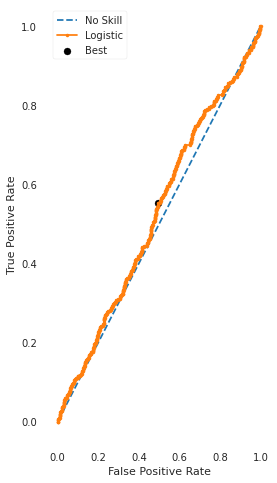

In [ ]:
from numpy import sqrt
m_name='Logistic Regression Down ROC'
model = lr_model
x = X_val_s
y = y_val

# Create ROC Curve 
y_hat_v = model.predict_proba(x)

# Keep only positive outcome probabilies (defaulters)
y_hat_v=y_hat_v[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val,y_hat_v)

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = argmax(gmeans)

best=thresholds[ix]

# Plot ROC
plt.figure(figsize=(4,8))

# plot no skill line
plt.plot([0,1], [0,1], linestyle ='--', label="No Skill")

# plot roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')

# plot best threshold point
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# label axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();

print('Best Threshold = ',best)

In [ ]:
#Logistic Regression Downsampled ROC
m_name= 'Logistic Regression  ROC'
model = lr_model
x = X_val_s
y = y_val

# create prediction with new threshold
y_pred_v = (model.predict_proba(x)[:,1]>=best).astype(int)

pred = y_pred_v

print('Classification Report:\n\n', classification_report(y,pred))

# Complete tracking datafram
new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.51      0.67     13311
           1       0.02      0.55      0.05       297

    accuracy                           0.51     13608
   macro avg       0.50      0.53      0.36     13608
weighted avg       0.96      0.51      0.65     13608



,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00
4,Simple Logistic Regression PRC,0.84,11204,2107,212,85,0.29
5,Logistic Regression Down,0.26,3447,9864,62,235,0.79
6,Logistic Regression ROC,0.51,6723,6588,133,164,0.55


##Logistic Regression SMOTE

In [ ]:
# Logistic Regression SMOTE
my_lr_model = logreg.fit(X_smote, y_smote)

# Predict on downsampled data
y_pred_v = my_lr_model.predict(X_val_s)
y_pred_test = my_lr_model.predict(X_test_s)

In [ ]:
#Logistic Regression SMOTE
m_name= 'Logistic Regression SMOTE '
model = my_lr_model
x = X_val_s
y = y_val
pred = y_pred_v

print('---'*20)
print('Classification Report:\n\n', classification_report(y,pred))

# Complete tracking dataframe
new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

------------------------------------------------------------
Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.58      0.73     13311
           1       0.03      0.62      0.06       297

    accuracy                           0.58     13608
   macro avg       0.51      0.60      0.40     13608
weighted avg       0.96      0.58      0.72     13608



,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00
4,Simple Logistic Regression PRC,0.84,11204,2107,212,85,0.29
5,Logistic Regression Down,0.26,3447,9864,62,235,0.79
6,Logistic Regression ROC,0.51,6723,6588,133,164,0.55
7,Logistic Regression SMOTE,0.58,7745,5566,114,183,0.62


In [ ]:
#Logistic Regression SMOTE - Test Data
m_name= 'Logistic Regression SMOTE - Test Data '
model = my_lr_model
x = X_test_s
y = y_test
pred = y_pred_test

print('Classification Report:\n\n', classification_report(y,pred))

# Complete tracking dataframe
new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.58      0.73     16639
           1       0.03      0.57      0.06       371

    accuracy                           0.58     17010
   macro avg       0.51      0.58      0.40     17010
weighted avg       0.96      0.58      0.72     17010



,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00
4,Simple Logistic Regression PRC,0.84,11204,2107,212,85,0.29
5,Logistic Regression Down,0.26,3447,9864,62,235,0.79
6,Logistic Regression ROC,0.51,6723,6588,133,164,0.55
7,Logistic Regression SMOTE,0.58,7745,5566,114,183,0.62
8,Logistic Regression SMOTE - Test Data,0.58,9733,6906,160,211,0.57


Logisitic Regression with SMOTE
------------------------------------------------------------


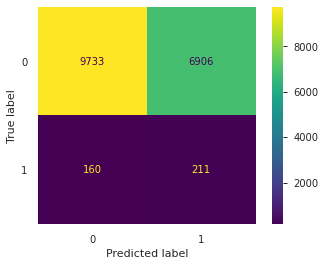

In [ ]:
# Plot confusion matrix
print('Logisitic Regression with SMOTE')
print('---'*20)

plot_confusion_matrix(my_lr_model, X_test_s, y_test, values_format='.0f');

##Logistic Regression ROC SMOTE
Makes minor difference

Best Threshold =  0.48509270140814525
Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.54      0.70     13311
           1       0.03      0.67      0.06       297

    accuracy                           0.54     13608
   macro avg       0.51      0.60      0.38     13608
weighted avg       0.97      0.54      0.69     13608



,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00
4,Simple Logistic Regression PRC,0.84,11204,2107,212,85,0.29
5,Logistic Regression Down,0.26,3447,9864,62,235,0.79
6,Logistic Regression ROC,0.51,6723,6588,133,164,0.55
7,Logistic Regression SMOTE,0.58,7745,5566,114,183,0.62
8,Logistic Regression SMOTE - Test Data,0.58,9733,6906,160,211,0.57
9,Logistic Regression SMOTE ROC,0.54,7211,6100,99,198,0.67


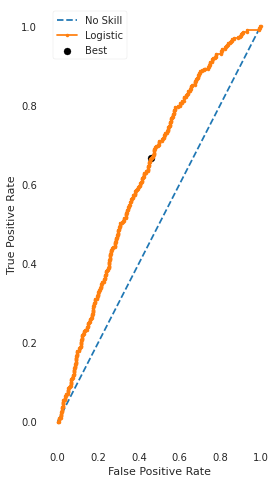

In [ ]:
# ROC SMOTE - Validation

from numpy import sqrt
# Create ROC Curve 
y_hat_v = my_lr_model.predict_proba(X_val_s)

# Keep only positive outcome probabilies (defaulters)
y_hat_v=y_hat_v[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val,y_hat_v)

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = argmax(gmeans)
best=thresholds[ix]

# Plot ROC
plt.figure(figsize=(4,8))

# plot no skill line
plt.plot([0,1], [0,1], linestyle ='--', label="No Skill")

# plot roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')

# plot best threshold point
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# label axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();

print('Best Threshold = ',best)

#Logistic Regression SMOTE
m_name= 'Logistic Regression SMOTE ROC'
model = my_lr_model
x = X_val_s
y = y_val

# create prediction with new threshold
y_pred_v = (my_lr_model.predict_proba(x)[:,1]>=best).astype(int)

pred = y_pred_v

print('Classification Report:\n\n', classification_report(y,pred))

# Complete tracking dataframe
new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

Best Threshold =  0.5153110498866539
Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.63      0.77     16639
           1       0.03      0.54      0.06       371

    accuracy                           0.63     17010
   macro avg       0.51      0.58      0.41     17010
weighted avg       0.96      0.63      0.75     17010



,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00
4,Simple Logistic Regression PRC,0.84,11204,2107,212,85,0.29
5,Logistic Regression Down,0.26,3447,9864,62,235,0.79
6,Logistic Regression ROC,0.51,6723,6588,133,164,0.55
7,Logistic Regression SMOTE,0.58,7745,5566,114,183,0.62
8,Logistic Regression SMOTE - Test Data,0.58,9733,6906,160,211,0.57
9,Logistic Regression SMOTE ROC,0.54,7211,6100,99,198,0.67


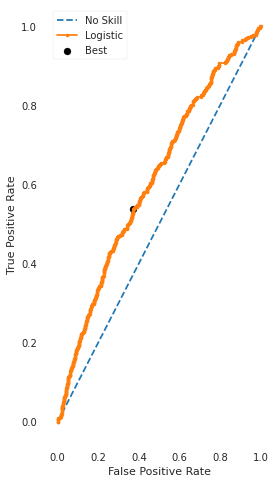

In [ ]:
# Logistic Regression SMOTE ROC - Test Data

# Create ROC Curve 
y_hat_v = my_lr_model.predict_proba(X_test_s)

# Keep only positive outcome probabilies (defaulters)
y_hat_v=y_hat_v[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_hat_v)

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = argmax(gmeans)

best=thresholds[ix]

# Plot ROC
plt.figure(figsize=(4,8))

# plot no skill line
plt.plot([0,1], [0,1], linestyle ='--', label="No Skill")

# plot roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')

# plot best threshold point
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# label axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();

print('Best Threshold = ',best)

m_name= 'Logistic Regression SMOTE ROC - Test Data'
model = my_lr_model
x = X_test_s
y = y_test

# create prediction with new threshold
y_pred_test = (my_lr_model.predict_proba(x)[:,1]>=best).astype(int)

pred = y_pred_test

print('Classification Report:\n\n', classification_report(y,pred))

# Complete tracking dataframe
new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

       Logisitic Regression SMOTE ROC - Test Data


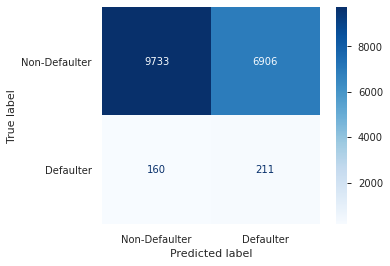

In [ ]:
# Plot confusion matrix
print('       Logisitic Regression SMOTE ROC - Test Data')


plot_confusion_matrix(my_lr_model, X_test_s, y_test, values_format='.0f', display_labels = ['Non-Defaulter', 'Defaulter'], cmap=plt.cm.Blues);


# Random Forest

In [ ]:
# not necessary with ordinal encoder
# encoder2=ce.OneHotEncoder()
# X_train_e2=encoder2.fit_transform(X_train)
# X_down_e2 = encoder2.transform(X_down)
# X_val_e2 = encoder2.transform(X_val)
# X_test_e2 = encoder2.transform(X_test)
# X_train_big_e2 = encoder2.transform(X_train_big)
# X_train_big_e2.shape, X_test_e2.shape

##Random Forest Simple Model

In [ ]:
# Random Forest Simple Model
# Define model
rf_simple = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit on train
rf_simple.fit(X_train_e, y_train)

# Predict on data
y_pred_v = rf_simple.predict(X_val_e)
y_pred_d = rf_simple.predict(X_down_e)
y_pred_test = rf_simple.predict(X_test_e)

m_name = 'Simple Random Forest'
y = y_val
pred = y_pred_v

print('Classification Report:\n\n', classification_report(y, pred))

# Complete tracking dataframe

new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

Classification Report:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     13311
           1       0.00      0.00      0.00       297

    accuracy                           0.98     13608
   macro avg       0.49      0.50      0.49     13608
weighted avg       0.96      0.98      0.97     13608



,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00
4,Simple Logistic Regression PRC,0.84,11204,2107,212,85,0.29
5,Logistic Regression Down,0.26,3447,9864,62,235,0.79
6,Logistic Regression ROC,0.51,6723,6588,133,164,0.55
7,Logistic Regression SMOTE,0.58,7745,5566,114,183,0.62
8,Logistic Regression SMOTE - Test Data,0.58,9733,6906,160,211,0.57
9,Logistic Regression SMOTE ROC,0.54,7211,6100,99,198,0.67


##Random Forest Using Downsampled Data

In [ ]:
rf_model =RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit on train
rf_model.fit(X_down_e, y_down)

# Predict on data
y_pred_t = rf_model.predict(X_down_e)
y_pred_v = rf_model.predict(X_val_e)

m_name = 'Random Forest Down'
y = y_val
pred = y_pred_v

print('Classification Report:\n\n', classification_report(y, pred))

# Complete tracking dataframe
new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.11      0.19     13311
           1       0.02      0.89      0.04       297

    accuracy                           0.12     13608
   macro avg       0.50      0.50      0.12     13608
weighted avg       0.96      0.12      0.19     13608



,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00
4,Simple Logistic Regression PRC,0.84,11204,2107,212,85,0.29
5,Logistic Regression Down,0.26,3447,9864,62,235,0.79
6,Logistic Regression ROC,0.51,6723,6588,133,164,0.55
7,Logistic Regression SMOTE,0.58,7745,5566,114,183,0.62
8,Logistic Regression SMOTE - Test Data,0.58,9733,6906,160,211,0.57
9,Logistic Regression SMOTE ROC,0.54,7211,6100,99,198,0.67


###Permutation Importances
Concluded that all features were likely important in all models

In [ ]:
# Use eli5 to create permuter
permuter = PermutationImportance(
    rf_model, #as defined above
    scoring = 'f1',
    n_iter=5, #number of random shuffles
    random_state=42
)
permuter.fit(X_down_e, y_down)
feature_names = X_train_e.columns.tolist()
feature_names

# Run permuter
pd.Series(permuter.feature_importances_, feature_names)

# Display in a useful way with eli5
eli5.show_weights(
    permuter,
    top=None, #no limit, show all features
    feature_names= feature_names
)

Weight,Feature
0.2587 ± 0.0039,num_unsecured_loans
0.1567 ± 0.0108,num_secured_loans
0.0221 ± 0.0037,max_loan
0.0187 ± 0.0018,loan_amount
0.0180 ± 0.0030,dealer
0.0169 ± 0.0022,YOB
0.0138 ± 0.0019,monthly_payment
0.0136 ± 0.0025,age
0.0127 ± 0.0013,int_rate
0.0084 ± 0.0032,employment


In [ ]:
print('Shape before removing features:', X_train_e.shape)

#Remove features less than 0 because they slow down the model and don't improve performance
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance #apply conditional statement to all elements of array
mask
new_features = X_train_e.columns[mask] #Select columns where mask is true (permutation score > 0)
X_trainx = X_train_e[new_features] #Save new X_train

print('Shape after removing features:', X_trainx.shape)

Shape before removing features: (54429, 17)
Shape after removing features: (54429, 17)


##Random Forest Using SMOTE Data

In [ ]:
# Random Forest Model SMOTE Data
# Tuning does not help
smote_rf_model =RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
# Fit on train
smote_rf_model.fit(X_smote,y_smote)

# Predict on data
y_pred_v = smote_rf_model.predict(X_val_e)
y_pred_test = smote_rf_model.predict(X_test_e)

print('Classification Report:\n\n', classification_report(y_val, y_pred_v))

# Complete tracking dataframe
m_name='Random Forest SMOTE'
y = y_val
pred = y_pred_v

new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.15      0.26     13311
           1       0.02      0.88      0.04       297

    accuracy                           0.17     13608
   macro avg       0.50      0.52      0.15     13608
weighted avg       0.96      0.17      0.26     13608



,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00
4,Simple Logistic Regression PRC,0.84,11204,2107,212,85,0.29
5,Logistic Regression Down,0.26,3447,9864,62,235,0.79
6,Logistic Regression ROC,0.51,6723,6588,133,164,0.55
7,Logistic Regression SMOTE,0.58,7745,5566,114,183,0.62
8,Logistic Regression SMOTE - Test Data,0.58,9733,6906,160,211,0.57
9,Logistic Regression SMOTE ROC,0.54,7211,6100,99,198,0.67


In [ ]:
# Random Forest Model SMOTE Data - Test
print('Classification Report:\n\n', classification_report(y_test, y_pred_test))

# Complete tracking dataframe
m_name='Random Forest SMOTE - Test Data'
y = y_test
pred = y_pred_test

new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.16      0.28     16639
           1       0.02      0.87      0.04       371

    accuracy                           0.18     17010
   macro avg       0.50      0.52      0.16     17010
weighted avg       0.96      0.18      0.27     17010



,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00
4,Simple Logistic Regression PRC,0.84,11204,2107,212,85,0.29
5,Logistic Regression Down,0.26,3447,9864,62,235,0.79
6,Logistic Regression ROC,0.51,6723,6588,133,164,0.55
7,Logistic Regression SMOTE,0.58,7745,5566,114,183,0.62
8,Logistic Regression SMOTE - Test Data,0.58,9733,6906,160,211,0.57
9,Logistic Regression SMOTE ROC,0.54,7211,6100,99,198,0.67


### Random Forest SMOTE with ROC

In [ ]:
# Validation Data

m_name='RF SMOTE ROC'
# Create ROC Curve 
y_hat_v = smote_rf_model.predict_proba(X_val_e)

y_hat_v=y_hat_v[:,1] # Keep only positive outcome probabilies (defaulters)

fpr, tpr, thresholds = roc_curve(y_val,y_hat_v) # Calculate ROC curve

gmeans = sqrt(tpr * (1-fpr))# calculate the g-mean for each threshold

ix = argmax(gmeans) # locate the index of the largest g-mean
best=thresholds[ix]

print('Best Threshold = ',best)

smote_rf_best = best

# create prediction with new threshold
y_pred_v_new = (smote_rf_model.predict_proba(X_val_e)[:,1]>=best).astype(int)

print('Classification Report:\n\n', classification_report(y_val, y_pred_v_new))

# Complete tracking dataframe
m_name= 'Random Forest SMOTE ROC'
y = y_val
pred = y_pred_v_new

new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

Best Threshold =  0.66
Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.56      0.71     13311
           1       0.03      0.52      0.05       297

    accuracy                           0.56     13608
   macro avg       0.50      0.54      0.38     13608
weighted avg       0.96      0.56      0.70     13608



,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00
4,Simple Logistic Regression PRC,0.84,11204,2107,212,85,0.29
5,Logistic Regression Down,0.26,3447,9864,62,235,0.79
6,Logistic Regression ROC,0.51,6723,6588,133,164,0.55
7,Logistic Regression SMOTE,0.58,7745,5566,114,183,0.62
8,Logistic Regression SMOTE - Test Data,0.58,9733,6906,160,211,0.57
9,Logistic Regression SMOTE ROC,0.54,7211,6100,99,198,0.67


In [193]:
# RF SMOTE ROC - Test Data
from numpy import sqrt
m_name='RF SMOTE ROC'
# Create ROC Curve 
y_hat_v = smote_rf_model.predict_proba(X_test_e2)

y_hat_v=y_hat_v[:,1] # Keep only positive outcome probabilies (defaulters)

fpr, tpr, thresholds = roc_curve(y_test,y_hat_v) # Calculate ROC curve

gmeans = sqrt(tpr * (1-fpr))# calculate the g-mean for each threshold

ix = argmax(gmeans) # locate the index of the largest g-mean
best=thresholds[ix]

print('Best Threshold = ',best)
best_rf = best

smote_rf_best = best# create prediction with new threshold - Test Data
y_pred_v_new_test = (smote_rf_model.predict_proba(X_test_e)[:,1]>=best).astype(int)

print('Classification Report:\n\n', classification_report(y_test, y_pred_v_new_test))

# Complete tracking dataframe
m_name= 'Random Forest SMOTE ROC - Test'
y = y_test
pred = y_pred_v_new_test

new_row=row_maker(m_name, y, pred)
tracker = tracker.append(new_row, ignore_index=True)
tracker

Best Threshold =  0.67
Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.58      0.73     16639
           1       0.03      0.49      0.05       371

    accuracy                           0.58     17010
   macro avg       0.50      0.53      0.39     17010
weighted avg       0.96      0.58      0.71     17010



,Model,Paid,True -,False +,False -,True +,Default
0,XG Boost,1.00,13311,0,297,0,0.00
1,XG Boost Down,0.11,1446,11865,32,265,0.89
2,Simple Logistic Regression,1.00,13311,0,297,0,0.00
3,Simple Logistic Regression,1.00,13311,0,297,0,0.00
4,Simple Logistic Regression PRC,0.84,11204,2107,212,85,0.29
5,Logistic Regression Down,0.26,3447,9864,62,235,0.79
6,Logistic Regression ROC,0.51,6723,6588,133,164,0.55
7,Logistic Regression SMOTE,0.58,7745,5566,114,183,0.62
8,Logistic Regression SMOTE - Test Data,0.58,9733,6906,160,211,0.57
9,Logistic Regression SMOTE ROC,0.54,7211,6100,99,198,0.67


##Shapley Values
Use Random Forest with SMOTE, it is a poor model, but it is what I can successfully use with Shapley

In [ ]:
# Use shapley values to examine why the model made this prediction
explainer = shap.TreeExplainer(smote_rf_model) # for tree based models

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [ ]:
# Create dataframe with encoded data
X_test_final = pd.DataFrame(X_test_e,columns=X_test.columns)
# verify that columns match for training & test data
X_smote.shape,X_test_final.shape

((106486, 17), (17010, 17))

In [ ]:
#list of predicted values
p_list= smote_rf_model.predict(X_test_e[0:]) 
p_list.shape

(17010,)

In [187]:
# Generate a list of incorrect predictions
wrong_list =[]
for i in range(0,17009):
  row = X_test.iloc[[i]]
  my_a_row = y_test.iloc[[i]].item()
  if p_list[i] != my_a_row:
    wrong_list.append(i)
print(len(wrong_list))

14002


In [189]:
# Generate list of defaulters
# error appeared in final run-through, a.item suggestion does not work
naughty_list=[]
for i in range(0,17009):
  row2 = y_test.iloc[[i]].item()
  if row2==1:
    naughty_list.append(i)
len(naughty_list)
print(len(naughty_list))
naughty_list[0:19] #print 20 values

371


[12,
 99,
 221,
 320,
 454,
 456,
 738,
 740,
 761,
 767,
 770,
 873,
 888,
 944,
 949,
 1184,
 1251,
 1370,
 1372]

In [190]:
# Find defaulters predicted incorrectly
my_set = set(naughty_list) & set(wrong_list)
sneaky_list= list(sorted(my_set))
print(len(sneaky_list))
sneaky_list

47


[99,
 1184,
 2248,
 2360,
 2739,
 2767,
 2769,
 3170,
 3172,
 3340,
 3422,
 4164,
 5000,
 5043,
 5875,
 6265,
 7204,
 7567,
 7592,
 7659,
 8258,
 8586,
 8688,
 8908,
 9344,
 9986,
 11001,
 11323,
 11665,
 11741,
 12119,
 12141,
 12267,
 12290,
 12499,
 12657,
 12987,
 13934,
 14217,
 14309,
 14382,
 14696,
 14943,
 14959,
 15244,
 15466,
 16700]

In [210]:
# Select an observation to test, FN:99, TP:453, TN:3
i=0
row = X_test_e.iloc[[i]] #select a row to create a Shapley Plot
a_row = y_test.iloc[[i]].values.tolist() # find the actual value
p_row = smote_rf_model.predict(row)#find the predicted value
pp_row = smote_rf_model.predict_proba(row) #see the probability that this would be the choice
print('Actual:', a_row)
print('Predicted:', p_row)
print('Probility of Prediction:', pp_row)

Actual: [0]
Predicted: [1]
Probility of Prediction: [[0.48 0.52]]


In [211]:
# Shapley Plot
print('True Value:', a_row,'  ','Predicted Value:', p_row)
shap_values = explainer.shap_values(row) #two arrays, one for each outcome
feature_names = row.columns

feature_values = row.values[0] #an array of the values in the selected row  
shap.initjs() #initialize Javascript
shap.force_plot(
    base_value = explainer.expected_value[p_row], # baseline value for this model predicted value
    # base_value = base_value, #ROC adjusted baseline
    shap_values = shap_values[(p_row).item()], # predicted value for this instance
    features=feature_names
)

True Value: [0]    Predicted Value: [1]
